In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from epimodel import EpiModel
from utility import *

from sklearn.linear_model import LinearRegression

N = 1402617695

* Assuming the total population of the country to be : $N = 1402617695$. We will assume it to be constant as the (number of deaths) << (total population).

* We know that $N = S + I + R + D \implies S = N - R - I - D$

Equations of the SIRD Model (Susceptible - Infected - Recovered - Dead) : 

* $\frac{dS}{dt} = - \frac{\beta I S}{N}$

* $\frac{dI}{dt} = \frac{\beta I S}{N} - \gamma I - \mu I$

* $\frac{dR}{dt} = \gamma I$

* $\frac{dD}{dt} = \mu I$

where $\beta$ is the infection rate, $\gamma$ is the recovery rate, $\mu$ is the mortality rate.

In [3]:
train_data = pd.read_csv("../data/training.csv")
test_data = pd.read_csv("../data/testing.csv")

In [4]:
train_data = process_dataframe(train_data)
test_data = process_dataframe(test_data)

In [5]:
train_data

,Date,Infected,Dead,Recovered,Susceptible,delS,delI,delR,delD,gamma,mu,beta
0,2020-01-30,1.0,0.0,0.0,1.402618e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-31,1.0,0.0,0.0,1.402618e+09,0.0,0.0,0.0,0.0,0.000000,0.000000,-0.000000
2,2020-02-01,1.0,0.0,0.0,1.402618e+09,0.0,0.0,0.0,0.0,0.000000,0.000000,-0.000000
3,2020-02-02,2.0,0.0,0.0,1.402618e+09,-1.0,1.0,0.0,0.0,0.000000,0.000000,1.000000
4,2020-02-03,3.0,0.0,0.0,1.402618e+09,-1.0,1.0,0.0,0.0,0.000000,0.000000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
370,2021-02-03,10790183.0,154703.0,10480455.0,1.381192e+09,-30830.0,12899.0,17824.0,107.0,0.001654,0.000010,0.002905
371,2021-02-04,10802591.0,154823.0,10496308.0,1.381164e+09,-28381.0,12408.0,15853.0,120.0,0.001469,0.000011,0.002671
372,2021-02-05,10814304.0,154918.0,10510796.0,1.381138e+09,-26296.0,11713.0,14488.0,95.0,0.001341,0.000009,0.002472
373,2021-02-06,10826363.0,154996.0,10522601.0,1.381114e+09,-23942.0,12059.0,11805.0,78.0,0.001092,0.000007,0.002248


In [6]:
test_data

,Date,Infected,Dead,Recovered,Susceptible,delS,delI,delR,delD,gamma,mu,beta
0,2021-02-08,10847304.0,155158.0,10548521.0,1.381067e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-02-09,10858371.0,155252.0,10561608.0,1.381042e+09,-24248.0,11067.0,13087.0,94.0,0.001206,0.000009,0.002270
2,2021-02-10,10871294.0,155360.0,10573372.0,1.381018e+09,-24795.0,12923.0,11764.0,108.0,0.001083,0.000010,0.002319
3,2021-02-11,10880603.0,155447.0,10589230.0,1.380992e+09,-25254.0,9309.0,15858.0,87.0,0.001459,0.000008,0.002359
4,2021-02-12,10892746.0,155550.0,10600625.0,1.380969e+09,-23641.0,12143.0,11395.0,103.0,0.001047,0.000009,0.002207
...,...,...,...,...,...,...,...,...,...,...,...,...
106,2021-05-25,27157795.0,311388.0,24350816.0,1.350798e+09,-509033.0,208921.0,295955.0,4157.0,0.010982,0.000154,0.019606
107,2021-05-26,27369093.0,315235.0,24633951.0,1.350299e+09,-498280.0,211298.0,283135.0,3847.0,0.010426,0.000142,0.019051
108,2021-05-27,27555457.0,318895.0,24893410.0,1.349850e+09,-449483.0,186364.0,259459.0,3660.0,0.009480,0.000134,0.017059
109,2021-05-28,27729247.0,322512.0,25178011.0,1.349388e+09,-462008.0,173790.0,284601.0,3617.0,0.010328,0.000131,0.017422


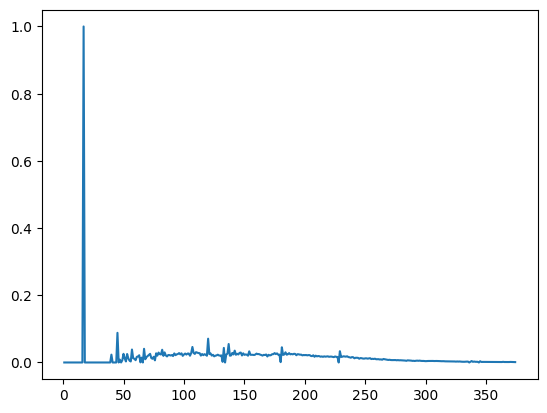

In [7]:
plt.plot(train_data['gamma'])

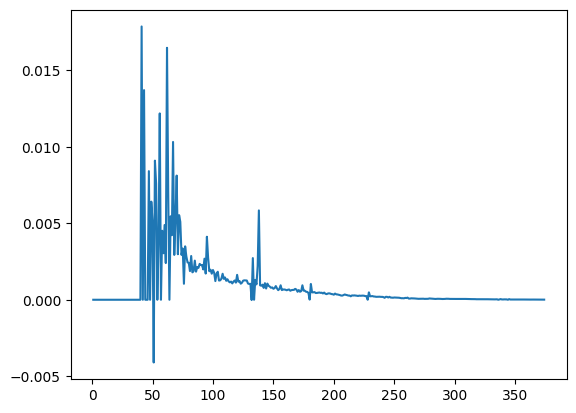

In [8]:
plt.plot(train_data['mu'])

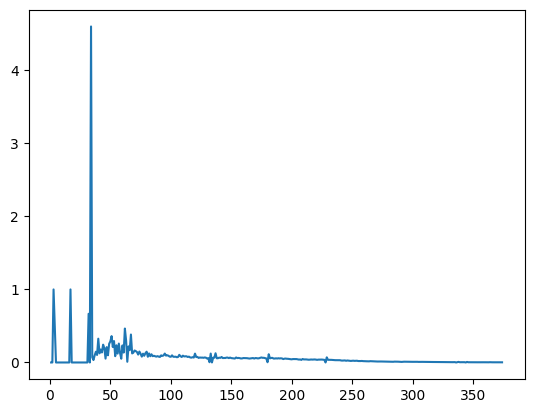

In [9]:
plt.plot(train_data['beta'])

In [10]:
train_data = train_data[50:]

In [11]:
train_data

,Date,Infected,Dead,Recovered,Susceptible,delS,delI,delR,delD,gamma,mu,beta
50,2020-03-20,244.0,5.0,20.0,1.402617e+09,-56.0,50.0,5.0,1.0,0.025773,0.005155,0.288660
51,2020-03-21,330.0,4.0,23.0,1.402617e+09,-88.0,86.0,3.0,-1.0,0.012295,-0.004098,0.360656
52,2020-03-22,396.0,7.0,24.0,1.402617e+09,-70.0,66.0,1.0,3.0,0.003030,0.009091,0.212121
53,2020-03-23,499.0,10.0,34.0,1.402617e+09,-116.0,103.0,10.0,3.0,0.025253,0.007576,0.292929
54,2020-03-24,536.0,10.0,40.0,1.402617e+09,-43.0,37.0,6.0,0.0,0.012024,0.000000,0.086172
...,...,...,...,...,...,...,...,...,...,...,...,...
370,2021-02-03,10790183.0,154703.0,10480455.0,1.381192e+09,-30830.0,12899.0,17824.0,107.0,0.001654,0.000010,0.002905
371,2021-02-04,10802591.0,154823.0,10496308.0,1.381164e+09,-28381.0,12408.0,15853.0,120.0,0.001469,0.000011,0.002671
372,2021-02-05,10814304.0,154918.0,10510796.0,1.381138e+09,-26296.0,11713.0,14488.0,95.0,0.001341,0.000009,0.002472
373,2021-02-06,10826363.0,154996.0,10522601.0,1.381114e+09,-23942.0,12059.0,11805.0,78.0,0.001092,0.000007,0.002248


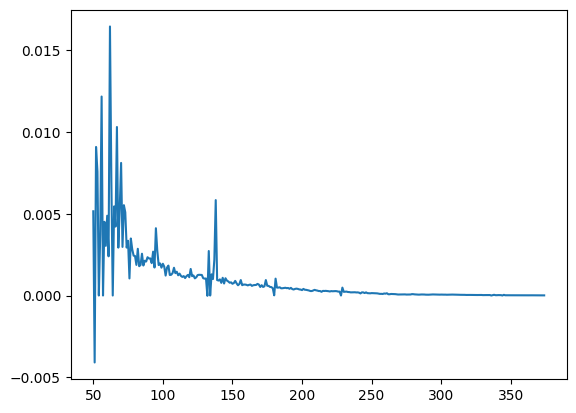

In [12]:
plt.plot(train_data['mu'])

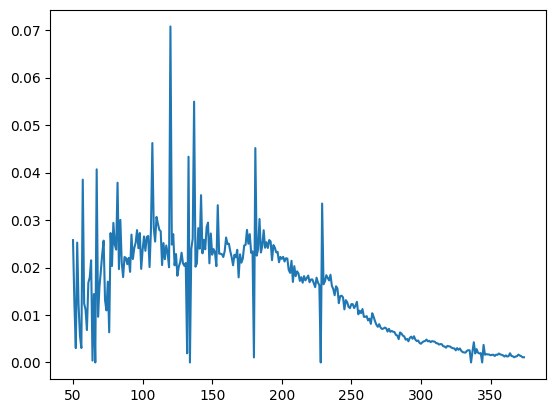

In [13]:
plt.plot(train_data['gamma'])

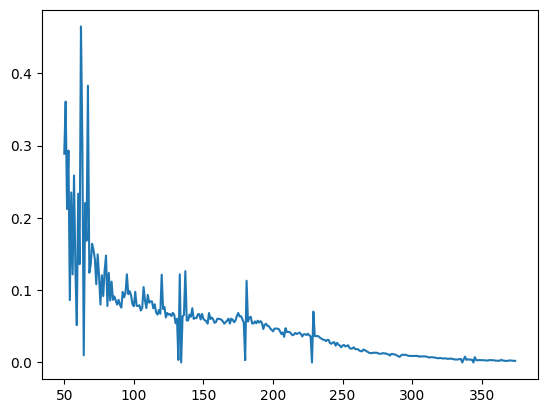

In [14]:
plt.plot(train_data['beta'])

In [15]:
# Lame Regressor
def predict_param(param):

    X = np.array([[(i + 50)] for i in range(325)])
    y = train_data[param].values

    model = LinearRegression()
    model.fit(X, y)

    test_X = np.array([[(i + 375)] for i in range(111)])
    predictions = model.predict(test_X)

    return predictions

In [16]:
beta_preds = predict_param("beta")
gamma_preds = predict_param("gamma")
mu_preds = predict_param("mu")

LameRegressorEpimodel = EpiModel(beta_preds, gamma_preds, mu_preds, train_data.iloc[324][1:5].values)

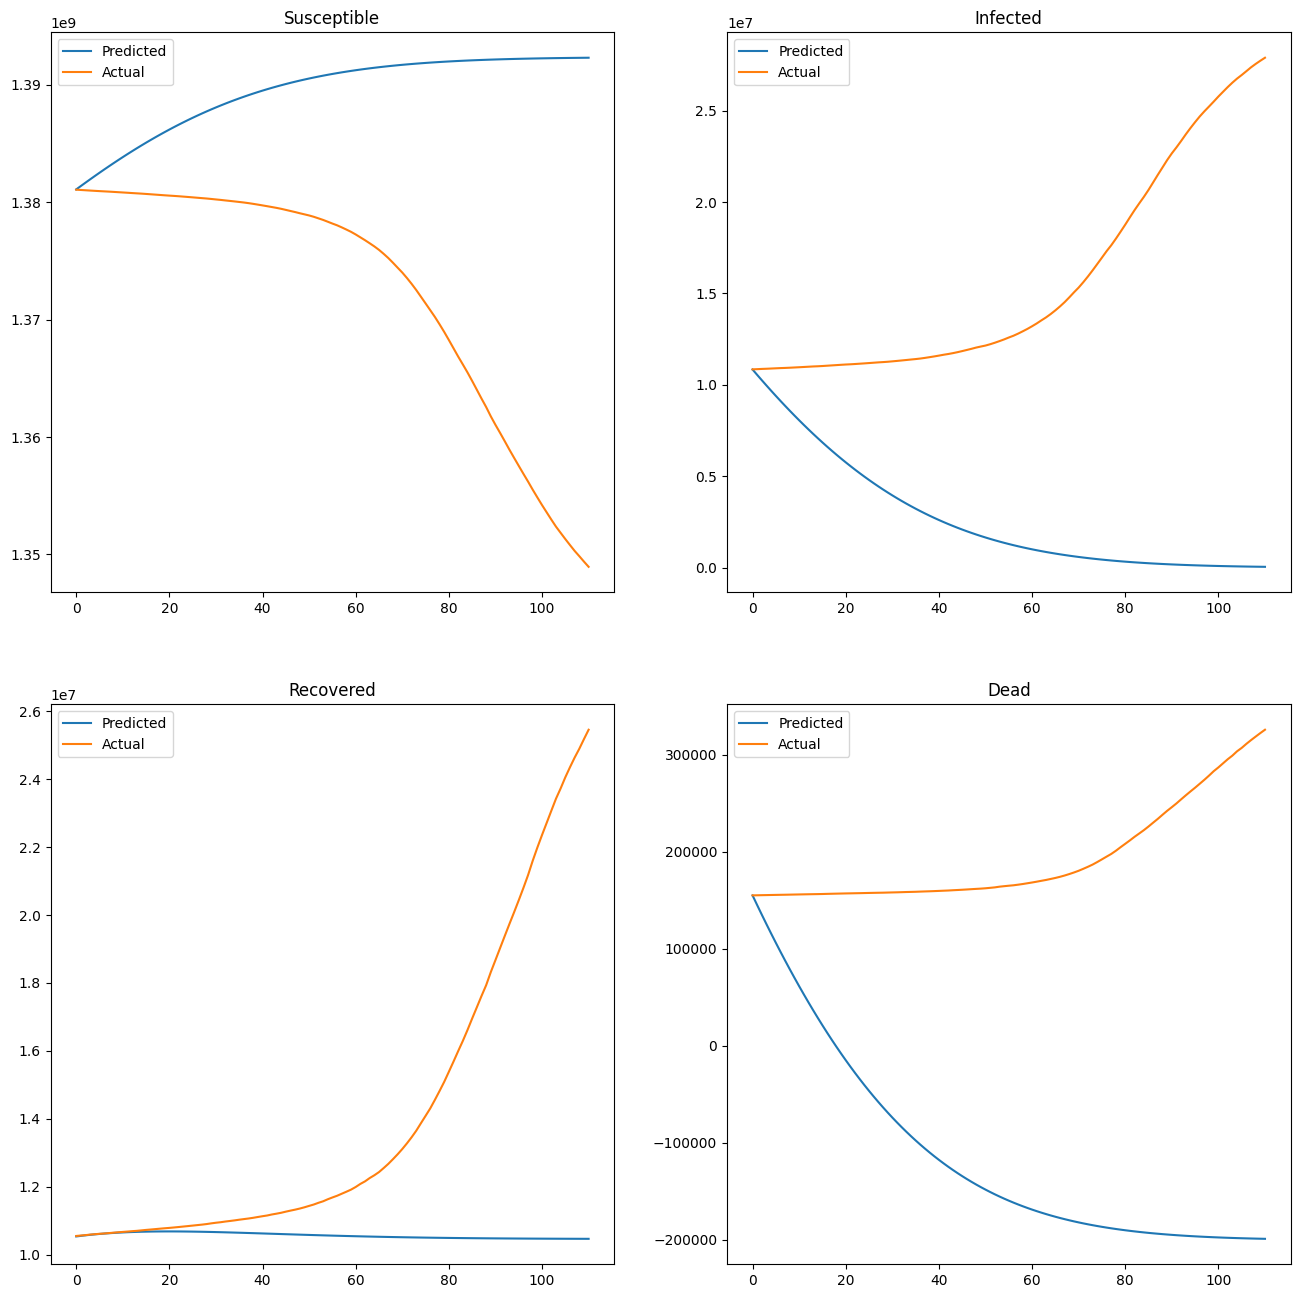

In [18]:
plot_epimodel(LameRegressorEpimodel, test_data, 0)

In [19]:
# Lookback based Linear Regressor

def predict_param(param, lookback):

    param_vals = train_data[param].values

    print(len(param_vals))

    X = np.array([param_vals[i + 1:i + lookback + 1] for i in range(325 - lookback - 1)])
    y = np.array([param_vals[i + lookback + 1] for i in range(325 - lookback - 1)])

    model = LinearRegression()
    model.fit(X, y)

    predictions = []
    current_lb = param_vals[-lookback:]

    for i in range(111):

        next_prediction = model.predict([current_lb])

        predictions.append(next_prediction[0])
        np.append(current_lb, next_prediction[0])
        
        current_lb = current_lb[-lookback:]


    return np.array(predictions)


In [20]:
beta_preds = predict_param("beta", 5)
gamma_preds = predict_param("gamma", 5)
mu_preds = predict_param("mu", 5)

LookbackRegressorModel = EpiModel(beta_preds, gamma_preds, mu_preds, train_data.iloc[324][1:5].values)

325
325
325


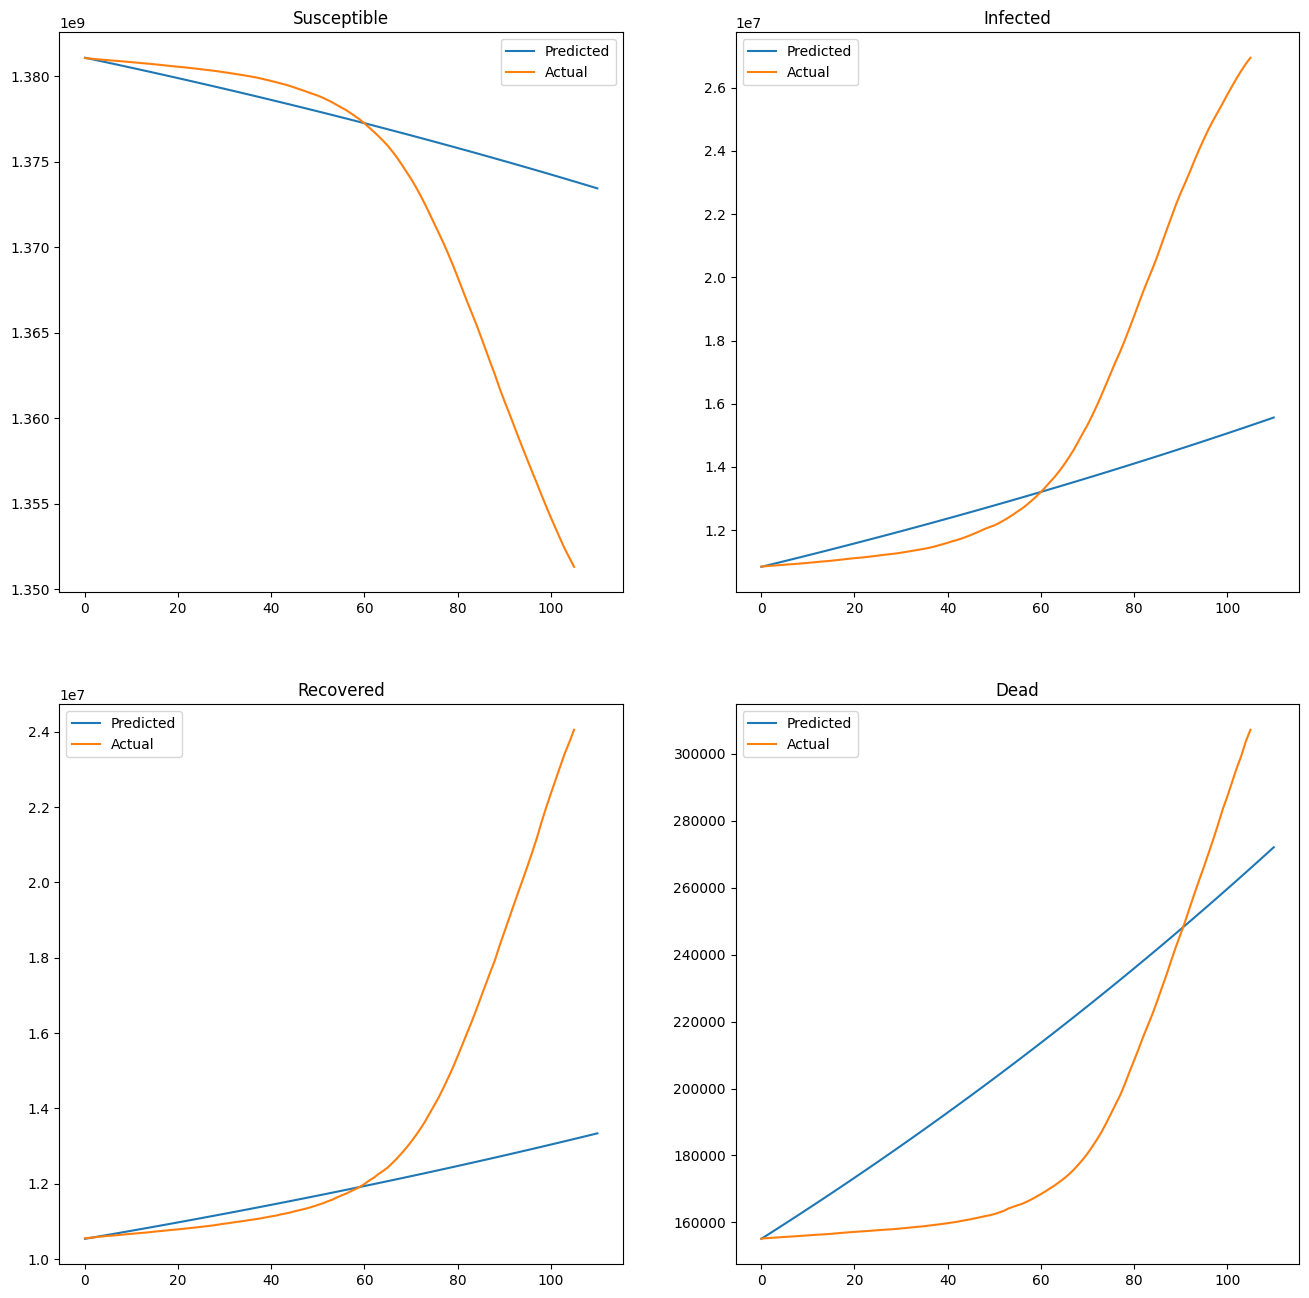

In [21]:
plot_epimodel(LookbackRegressorModel, test_data, 5)

In [22]:
beta_preds = predict_param("beta", 30)
gamma_preds = predict_param("gamma", 30)
mu_preds = predict_param("mu", 30)

LookbackRegressorModel = EpiModel(beta_preds, gamma_preds, mu_preds, train_data.iloc[324][1:5].values)

325
325
325


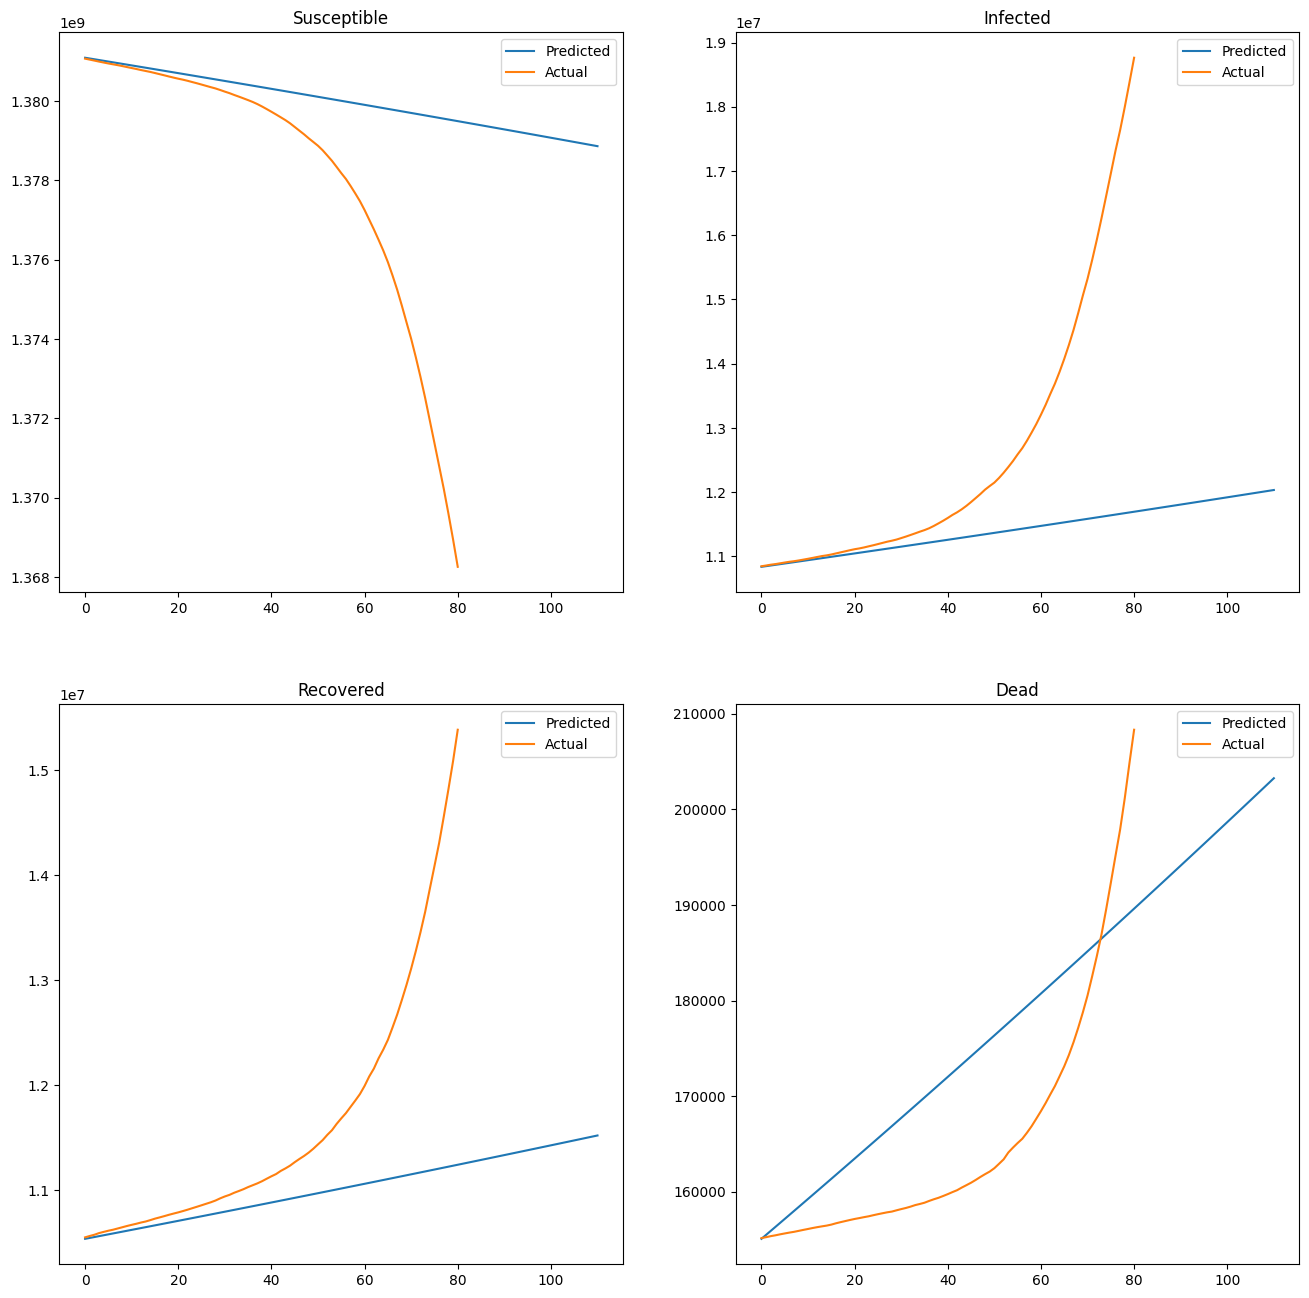

In [23]:
plot_epimodel(LookbackRegressorModel, test_data, 30)